In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import statistics
import math

def show_bar_chart(xlabels,rvs,title):
    """
    Will count the random values that then plot the graph
    @para xlabels: labels on the x axis
    @para rvs: random values that generated
    @para title: title that will show on the top of the graph
    """
    frequencies = [0]*len(xlabels)
    for i in rvs:
        if i>=0 and i <len(xlabels): # jump out when the values is out of our graph
            frequencies[i]+=1
    sns.set_style('whitegrid')
    figure = plt.figure(figsize=(15,3)) # set appropriate figure size
    axes = sns.barplot(xlabels,frequencies,color='b')
    axes.set_title(title)
    axes.set(xlabel='Value',ylabel='Frequency')
    plt.show()
    

def sample_mean(xlabels,rvs, sample_size,sample_count,sigma):
    """
    Will use central limit theorem to calculate the sample mean, call show_bar_chart to show the graph
    @para xlabels: labels on the x axis
    @para rvs: random values that generated
    @para sample_size: size of numbers select for each sample
    @para sample_count: number group of samples we select for central limit theorm
    @para sigma: standard devaition of the original distribution
    """
    means_list=[int(statistics.mean(random.sample(rvs, sample_size))) for _ in range(sample_count)]
    #pick samples randomly from the population
    stderr=sigma/math.sqrt(sample_size)
    title = f'Sampling Distrubution of Means, Sample count= {sample_count:},'\
            f'Sample size={sample_size}, Mean={statistics.mean(means_list):.2f}, Standard error={stderr:.2f}'
    show_bar_chart(xlabels,means_list,title)
    
    
    
def sample_stddev(xlabels,rvs, sample_size,sample_count,sigma):
    """
    Will use central limit theorem to calculate the sample standard deviation, call show_bar_chart to show the graph
    @para xlabels: labels on the x axis
    @para rvs: random values that generated
    @para sample_size: size of numbers select for each sample
    @para sample_count: number group of samples we select for central limit theorm
    @para sigma: standard devaition of the original distribution
    """
    stddev_list=[int(statistics.stdev(random.sample(rvs, sample_size))) for _ in range(sample_count)]
    stderr=sigma/math.sqrt(sample_size)
    title= f'Sampling Distrubution of Means, Sample count= {sample_count:},'\
           f'Sample size={sample_size}, Mean={statistics.mean(stddev_list):.2f}, '\
           f'Standard error={stderr:.2f}'
    show_bar_chart(xlabels,stddev_list,title)
    
def sample_q1(xlabels,rvs, sample_size,sample_count,sigma):
    """
    Will use central limit theorem to calculate the sample number one quantile, call show_bar_chart to show the graph
    @para xlabels: labels on the x axis
    @para rvs: random values that generated
    @para sample_size: size of numbers select for each sample
    @para sample_count: number group of samples we select for central limit theorm
    @para sigma: standard devaition of the original distribution
    """
    q1_list=[int(np.percentile(random.sample(rvs, sample_size),25)) for _ in range(sample_count)]
    stderr=sigma/math.sqrt(sample_size)
    title= f'Sampling Distrubution of Means, Sample count= {sample_count:},'\
           f'Sample size={sample_size}, Mean ={statistics.mean(q1_list):.2f}, '\
           f'Standard error={stderr:.2f}'
    show_bar_chart(xlabels,q1_list,title)
    

# Exponential distributions

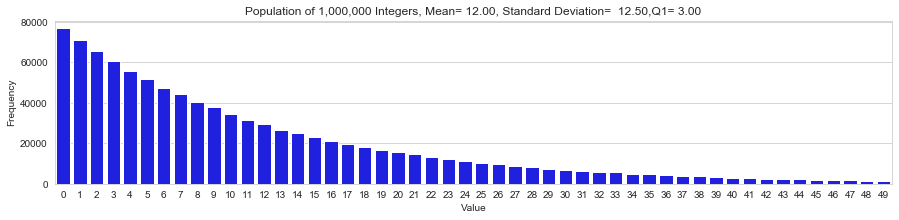

In [3]:
population_size=1000000
population_max=50

xlabels=list(range(population_max))
rvs = [int(random.expovariate(1/12.5))for _ in range(population_size)] 
#tried using np.random but it will generate numpy type numbers
q1=np.percentile(rvs,25)
stddev = statistics.stdev(rvs)
mean=statistics.mean(rvs)
title=f'Population of {population_size:,} Integers, Mean={mean: .2f}, Standard Deviation= {stddev: .2f},Q1={q1: .2f}'
show_bar_chart(xlabels,rvs,title)

## Sampling Distribution of the Mean

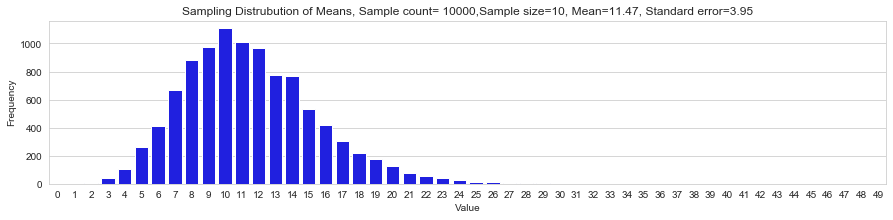

In [4]:
sample_mean(xlabels,rvs,10,10000,stddev) # Camparing group

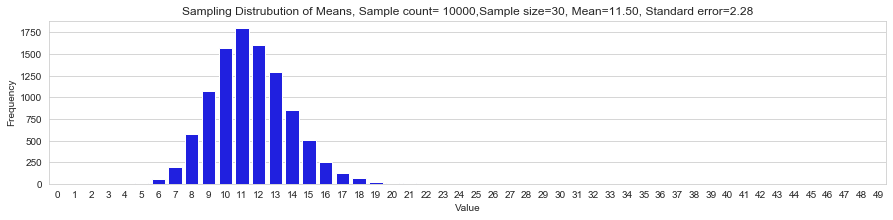

In [5]:
sample_mean(xlabels,rvs,30,10000,stddev) # using different sample size

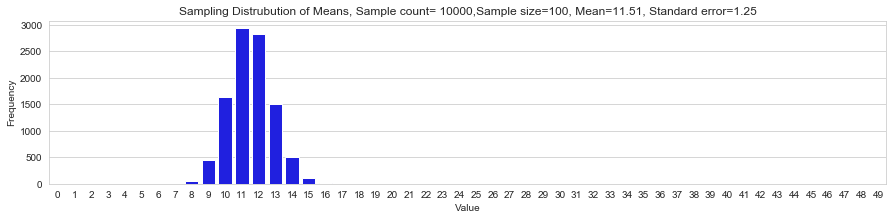

In [6]:
sample_mean(xlabels,rvs,100,10000,stddev) # using even larger sample size

### Central limit theorem for sample mean with different sample sizes
From the three graphs above, we can see that with larger size, the result will be more normally distributed, and the sample means will be more tend to be close to the acutal mean

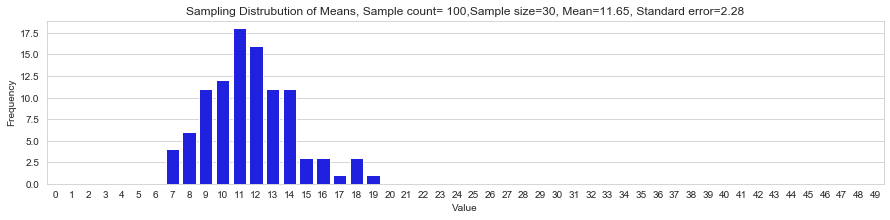

In [7]:
sample_mean(xlabels,rvs,30,100,stddev)

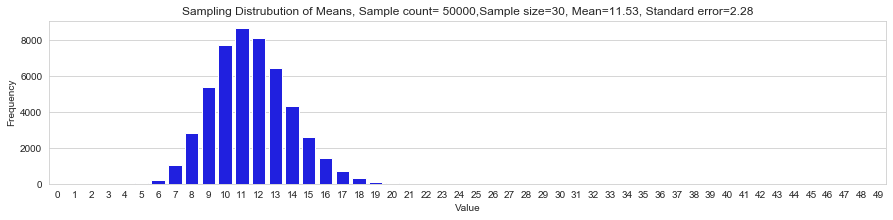

In [8]:
sample_mean(xlabels,rvs,30,50000,stddev)

### Central limit theorem for sample mean with different sample counts
From the above two graphs camparing with our first graph of this set, we can see that with more sample counts, our result is more normally distributed. The sample mean is closer to the acutally mean.

## Sampling Distribution of Standard Deviation
Just a reminder that the original standard deviation is 12.48

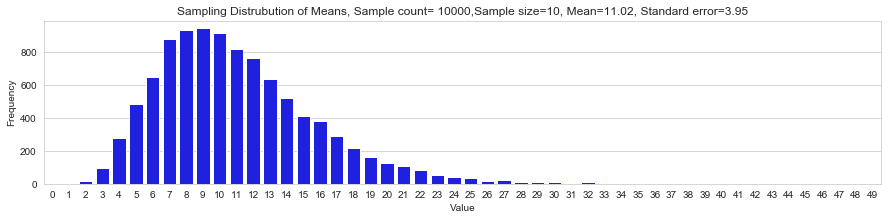

In [9]:
sample_stddev(xlabels,rvs,10,10000,stddev) # comparing group

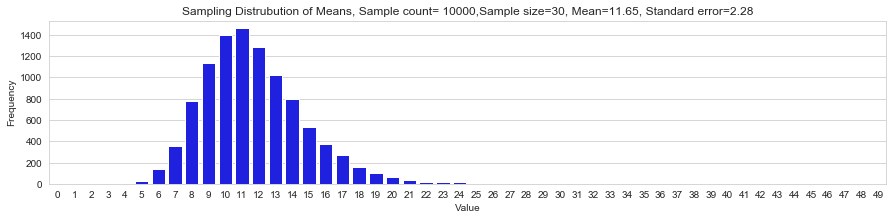

In [10]:
sample_stddev(xlabels,rvs,30,10000,stddev)

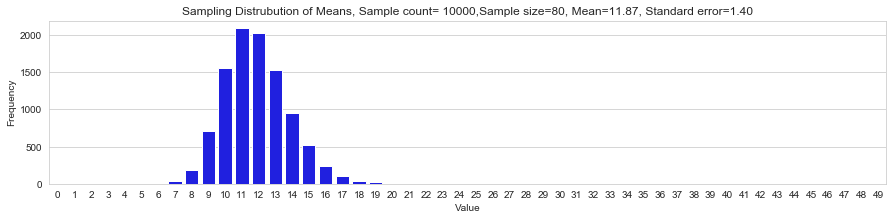

In [11]:
sample_stddev(xlabels,rvs,80,10000,stddev)

### Central limit theorem for sample standard with different sample sizes
From the three graphs above, same as sample mean, we can see that with larger size, the result will be more normally distributed, and the sample means will be more tend to be close to the acutal standard deviation.

# Sampling Distribution of the First Quartiles
Reminder that the fist quntile for orgianl population is 3.00

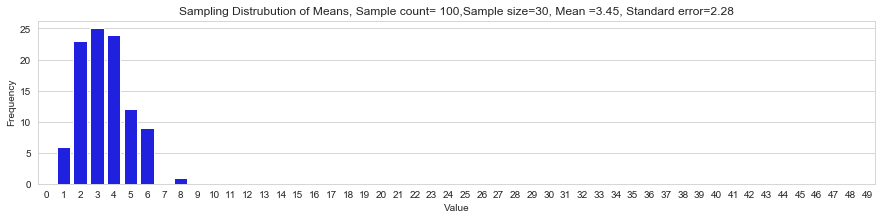

In [12]:
sample_q1(xlabels,rvs,30,100,stddev)

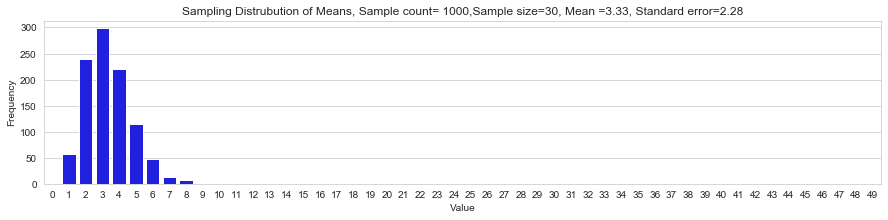

In [13]:
sample_q1(xlabels,rvs,30,1000,stddev)

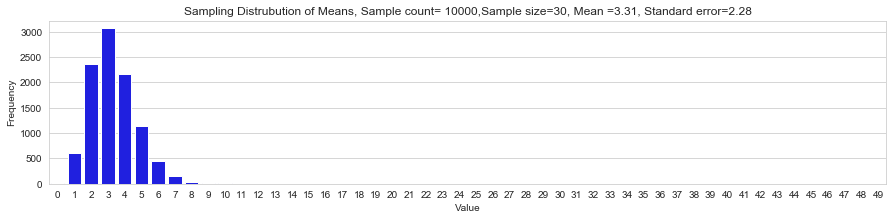

In [14]:
sample_q1(xlabels,rvs,30,10000,stddev)

### Central limit theorem for sample first quantile with different sample sizes
From the three graphs above, we can see that with larger size, the result will be more normally distributed, and the sample first quantile will be closer to the acutal frist quantile.

# Normal Distributions

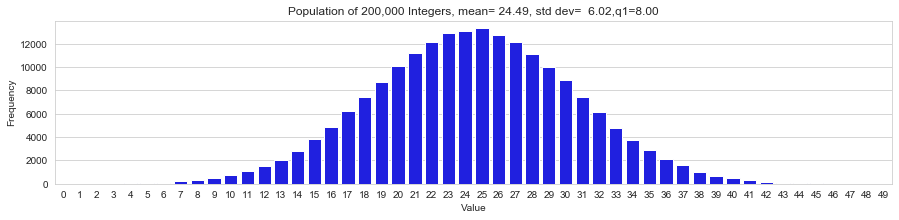

In [39]:
population_size=200000
population_max=50
q1=np.percentile(rvs,25)

xlabels=list(range(population_max))
rvs = [int(random.normalvariate(25,6))for _ in range(population_size)]
stddev = statistics.pstdev(rvs)
mean=statistics.mean(rvs)
title=f'Population of {population_size:,} Integers, mean={mean: .2f}, std dev= {stddev: .2f},q1={q1:.2f}'
show_bar_chart(xlabels,rvs,title)

# Sampling Distribution of the Mean

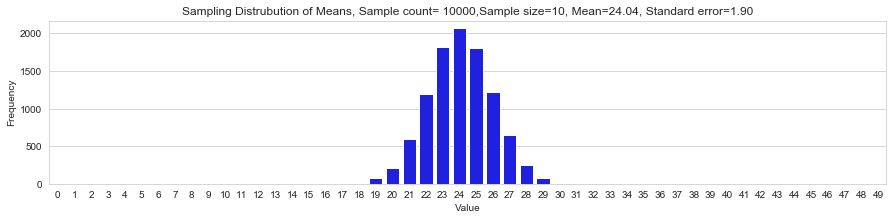

In [40]:
sample_mean(xlabels,rvs,10,10000,stddev)

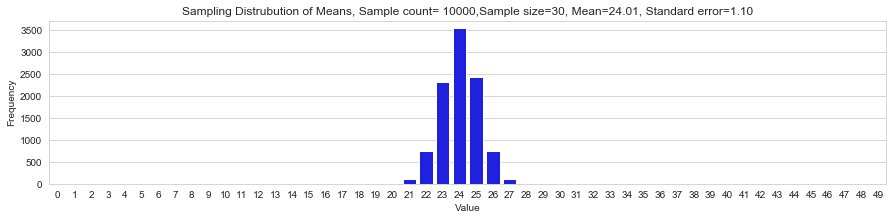

In [41]:
sample_mean(xlabels,rvs,30,10000,stddev)

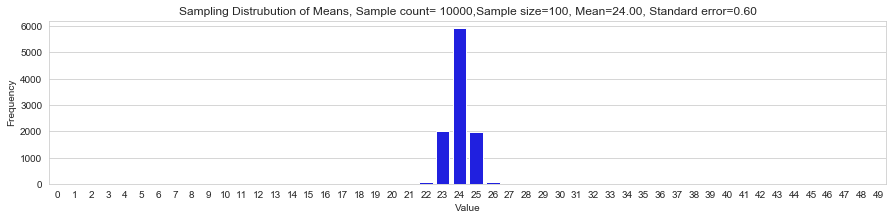

In [42]:
sample_mean(xlabels,rvs,100,10000,stddev)

### Central limit theorem for standard deviation with different sample sizes
We can see that that with the same sample count, the larger the sample size, the more nomralized the result is. 

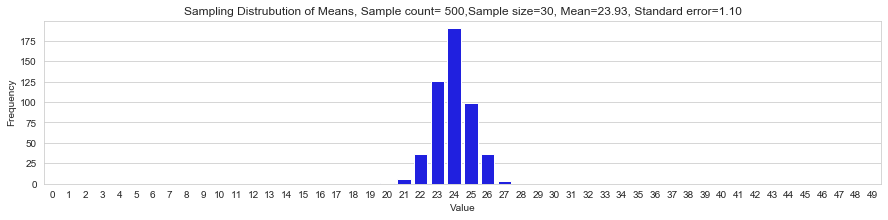

In [43]:
sample_mean(xlabels,rvs,30,500,stddev)

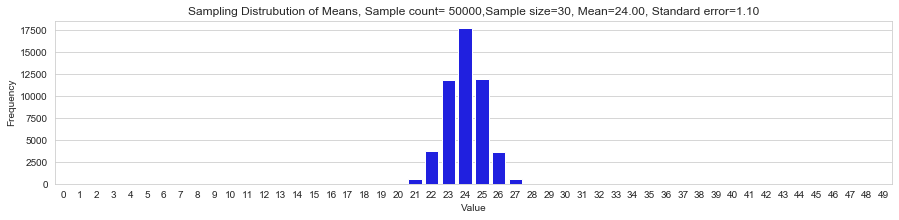

In [44]:
sample_mean(xlabels,rvs,30,50000,stddev)

# Sampling Distribution of Standard Deviation

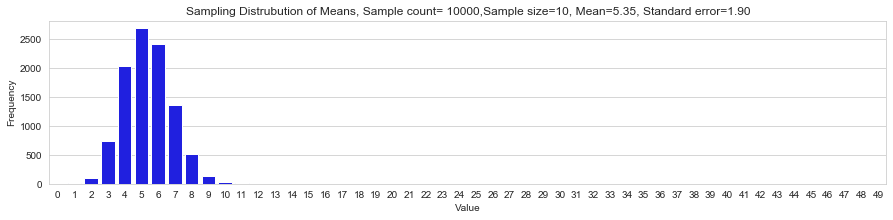

In [21]:
sample_stddev(xlabels,rvs,10,10000,stddev)

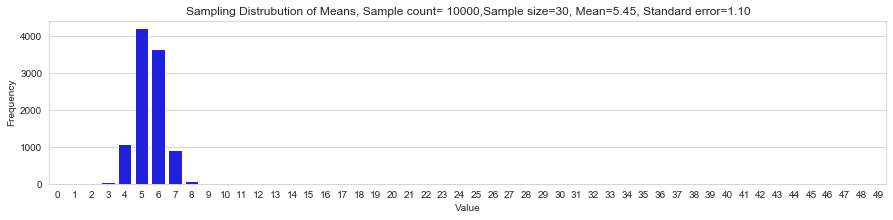

In [22]:
sample_stddev(xlabels,rvs,30,10000,stddev)

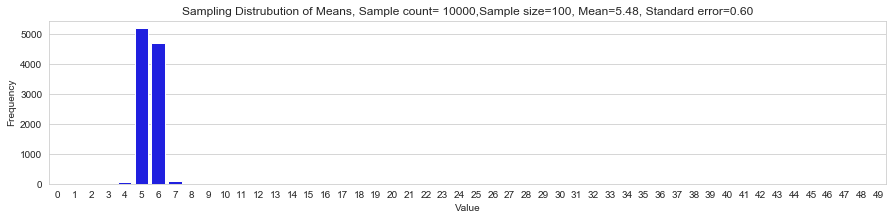

In [23]:
sample_stddev(xlabels,rvs,100,10000,stddev)

# Sampling Distribution of the First Quartiles

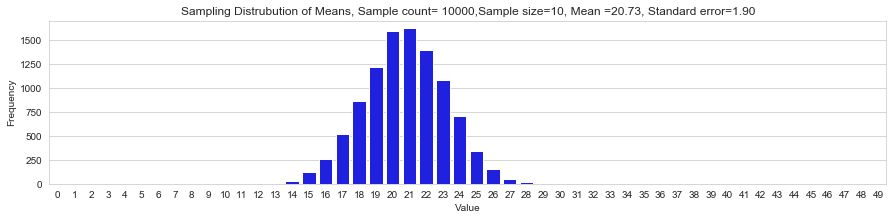

In [24]:
sample_q1(xlabels,rvs,10,10000,stddev)

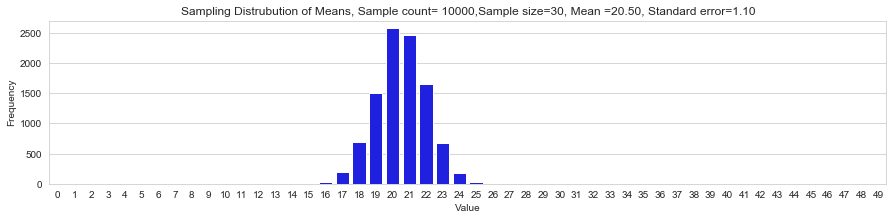

In [25]:
sample_q1(xlabels,rvs,30,10000,stddev)

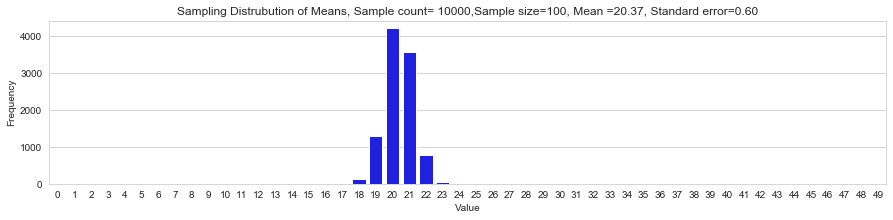

In [26]:
sample_q1(xlabels,rvs,100,10000,stddev)

# Binomial Distribution

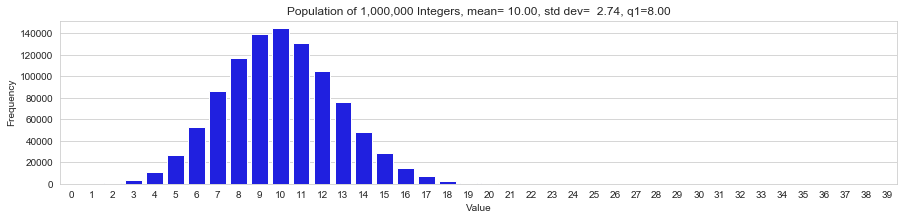

In [55]:
population_size=1000000
population_max=40
q1=np.percentile(rvs,25)

xlabels=list(range(population_max))
rvs = [int(np.random.binomial(40,0.25))for _ in range(population_size)]
stddev = statistics.pstdev(rvs)
mean=statistics.mean(rvs)
title=f'Population of {population_size:,} Integers, mean={mean: .2f}, std dev= {stddev: .2f}, q1={q1:.2f}'
show_bar_chart(xlabels,rvs,title)

# Sampling Distribution of the Mean

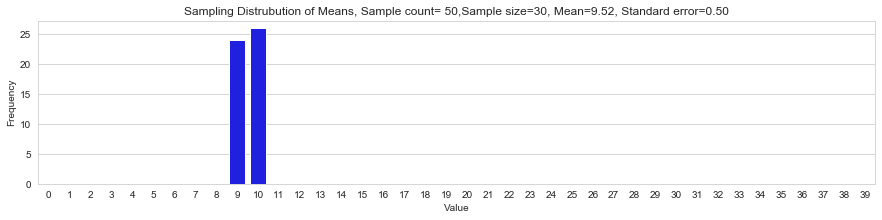

In [56]:
sample_mean(xlabels,rvs,30,50,stddev)

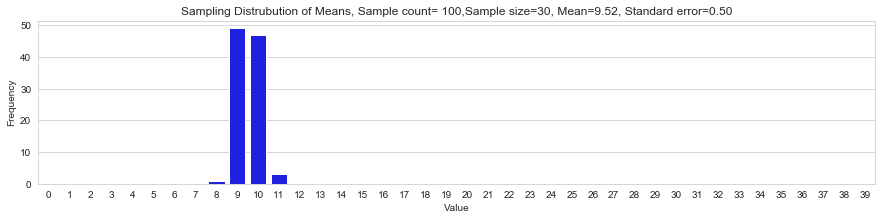

In [57]:
sample_mean(xlabels,rvs,30,100,stddev)

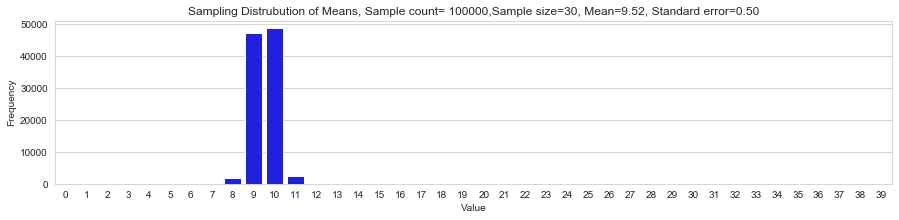

In [58]:
sample_mean(xlabels,rvs,30,100000,stddev)

# Sampling Distribution of Standard Deviation

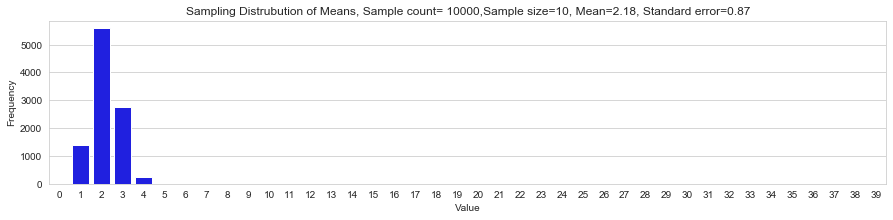

In [59]:
sample_stddev(xlabels,rvs,10,10000,stddev)

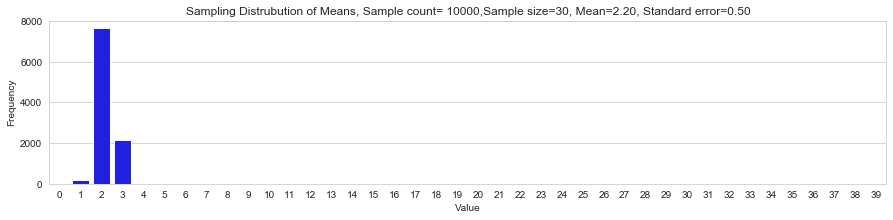

In [60]:
sample_stddev(xlabels,rvs,30,10000,stddev)

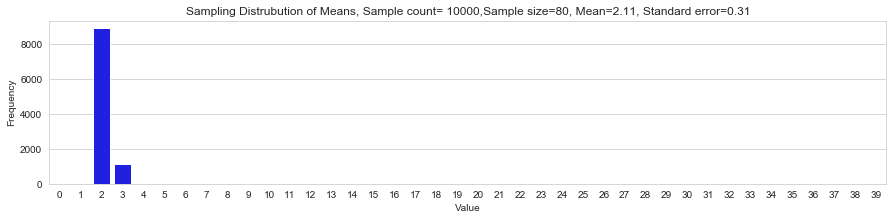

In [61]:
sample_stddev(xlabels,rvs,80,10000,stddev)

# Sampling Distribution of the First Quartiles

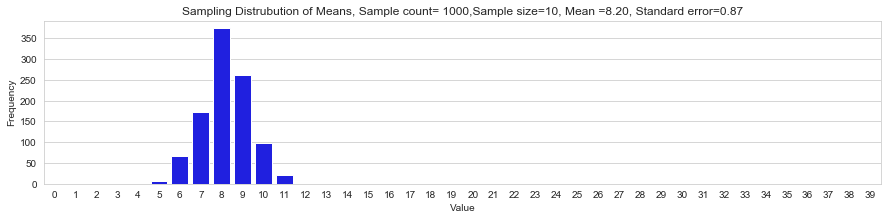

In [62]:
sample_q1(xlabels,rvs,10,1000,stddev)

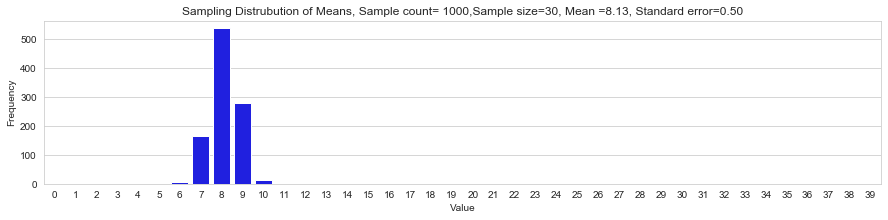

In [63]:
sample_q1(xlabels,rvs,30,1000,stddev)

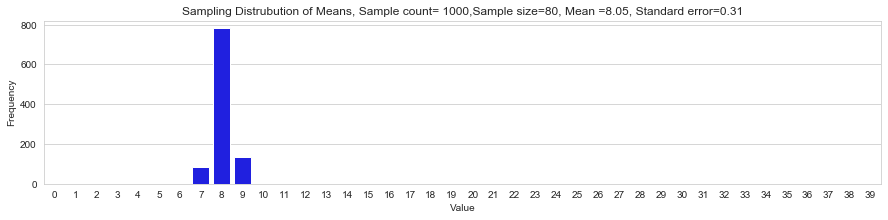

In [64]:
sample_q1(xlabels,rvs,80,1000,stddev)

# Population Description


Exponential Distribution 
In this experiment, we randomly generate exponential distribution population of 1,000,000 ,with  λ=1/12.5. By calculating population statistics parameters, mean = 12.00, standard deviation = 12.50, 25% percentile = 3.00.

Normal Distribution 
In this experiment, we randomly generate exponential distribution population of 200,000. By calculating population statistics parameters, mean = 24.49, standard deviation = 6.02, 25% percentile = 8.00.

Binomial Distribution 
In this experiment, we randomly generate exponential distribution population of 1,000,000. p= 0.25 of 40 trails. By calculating population statistics parameters, mean = 10.00, standard deviation = 2.74, 25% percentile = 8.00.


# Sample size and sample count description

In our experiments, we use three different distributions: exponential, normal and binomial. For each distribution, we estimate three population parameters: mean, standard deviation and Q1. We compare our results using different number of samples 50, 500, 10000, 50000 and different sample size 10, 30, 80.

In control one factor and change the others, we can see how sample size and sample counts will affect the Central Limit Theorem.

# Results

We find out that, with appropirate selection of sample size and sample counts, central limit theorem is a good approxiamtion of the population mean, standard deviation and first quantile for exponential, normal, and binomial distribution.

Sample size is an important choice that the mean distribution may not be be normalized if the sample size is too small. Just like the central limit theorem stated, larger than 30 should be a good determine line.

With larger sample size, the distribution of samples is more normalized (smaller standard deviation, narrower graph). 
With larger sample counts, the result will be more accurate